<h1 align="center">NBA Database (SQL)</h1>

<h3>Introduction</h3>

<p>The National Basketball Association (NBA) is a men's professional basketball league in North America; composed of 30 teams (29 in the United States and 1 in Canada). It is widely considered to be the premier men's professional basketball league in the world. The NBA is an active member of USA Basketball (USAB), which is recognized by FIBA (also known as the International Basketball Federation) as the national governing body for basketball in the United States. The NBA is one of the four major professional sports leagues in the United States and Canada. NBA players are the world's best paid athletes by average annual salary per player. Here, I am about to design a database for the NBA basketball conference. Here is the mini-world description: Each team has 15 players. Players have names, heights, weights, positions they play. We assume that no two players will have exactly the same name. Each team also has a coach. The coaches’ names, years in practice, and salary will be stored in the database. Again, we assume that no two coaches will have exactly the same name. Each team will play against other teams. For each game, the date of the game, location of the game as well as the score of two teams (home and visitor) will be recorded.</p>

<p>Choose three entities:player coach and teams<p>
er diagram:![_auto_0](attachment:_auto_0)

<h2>SQL database</h2>

<br>

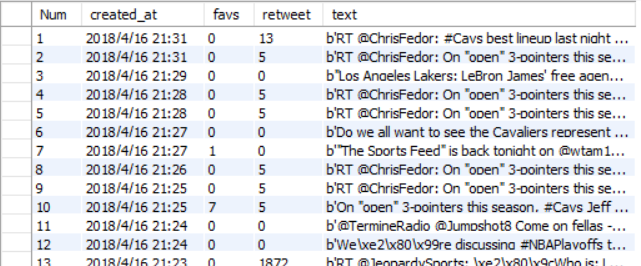
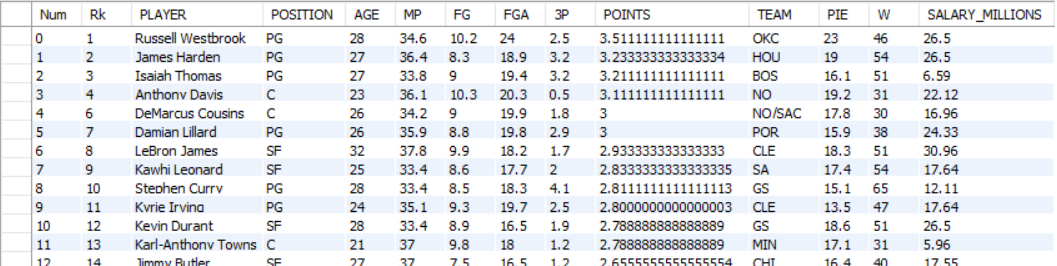

<br>




<br>


<h4>Set the keys and tokens for connecting to Tweepy</h4>
Go to http://dev.twitter.com/apps/new to create an app and get values

In [3]:
import pymysql
import tweepy
import json
from dateutil import parser
import pandas as pd
import re
import pymysql
import sqlalchemy
import numpy as np  
import twitter 
from pandas.io import sql
import csv
import json
import pandas as pd
import sys, getopt, pprint

In [5]:
consumerKey = 'g98ma1alivKBO1F8mgxqsmhwW'
consumerSecret = 'Wqqps3csXjVEZZIIZ49CwuWvjBEA0bGb2ym8ggdWNAi4ibq5rK'
ACCESS_TOKEN = '902363121804869634-vZ2NjxwulAqfGghqc7ml22JUBAGEFZf'
ACCESS_SECRET = 'UOvosciATenpQFDkOMq1LjRD8TJ1pcuwXPUyhtkku4xz5'
#Use tweepy.OAuthHandler to create an authentication using the given 

auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
    consumer_secret=consumerSecret)

#Connect to the Twitter API using the authentication
api = tweepy.API(auth)

In [6]:
results = []

try:


#Get the first 5000 items based on the search query
 for tweet in tweepy.Cursor(api.search, q='%#Lebronjames', since='2018-04-21',until='2018-04-23').items(1000):
     results.append(tweet)

except tweepy.error.TweepError:
  raise

# Verify the number of items returned print 
len (results)

562

In [7]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text.encode('utf-8') for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet 
    in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet 
    in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]




    return DataSet

#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [8]:
DataSet.head(100)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated
0,988205504471150592,b'RT @IamDMarge: LeBron James &amp; The Clevel...,2,0,USAsportFortu,2018-04-22 23:58:46
1,988205424879976449,b'RT @IamDMarge: LeBron James &amp; The Clevel...,2,0,Twitter Web Client,2018-04-22 23:58:27
2,988205172114440192,"b'#LeBronJames, Cavaliers Once Again Wear Matc...",0,1,dlvr.it,2018-04-22 23:57:27
3,988204447443677189,"b""#LeBronJames RESPONDS TO #SkipBayless Saying...",0,0,Twitter for iPad,2018-04-22 23:54:34
4,988204133281910787,b'RT @UpscaleHype: Iconic. Shades of Grey\xe2\...,1,0,Twitter for iPhone,2018-04-22 23:53:19
5,988203460767215619,b'Iconic. Shades of Grey\xe2\x84\xa2\xef\xb8\x...,1,2,Twitter for iPhone,2018-04-22 23:50:39
6,988203412436107264,b'LeBron James &amp; The Cleveland Cavaliers T...,2,1,D'Marge Autopost,2018-04-22 23:50:28
7,988202925074927617,b'RT @lollolfest: #humor #comedians #jokes #la...,3,0,Twitter for iPhone,2018-04-22 23:48:31
8,988202085089857537,b'@kingjames says his Legacy is what he does o...,0,0,Instagram,2018-04-22 23:45:11
9,988202023408545793,"b""Je n'ai rien contre les #Pacers mais j'esp\x...",5,57,Twitter for Android,2018-04-22 23:44:56


In [9]:
DataSet.to_csv('Lebronjames23.csv' )

Show the csv data:
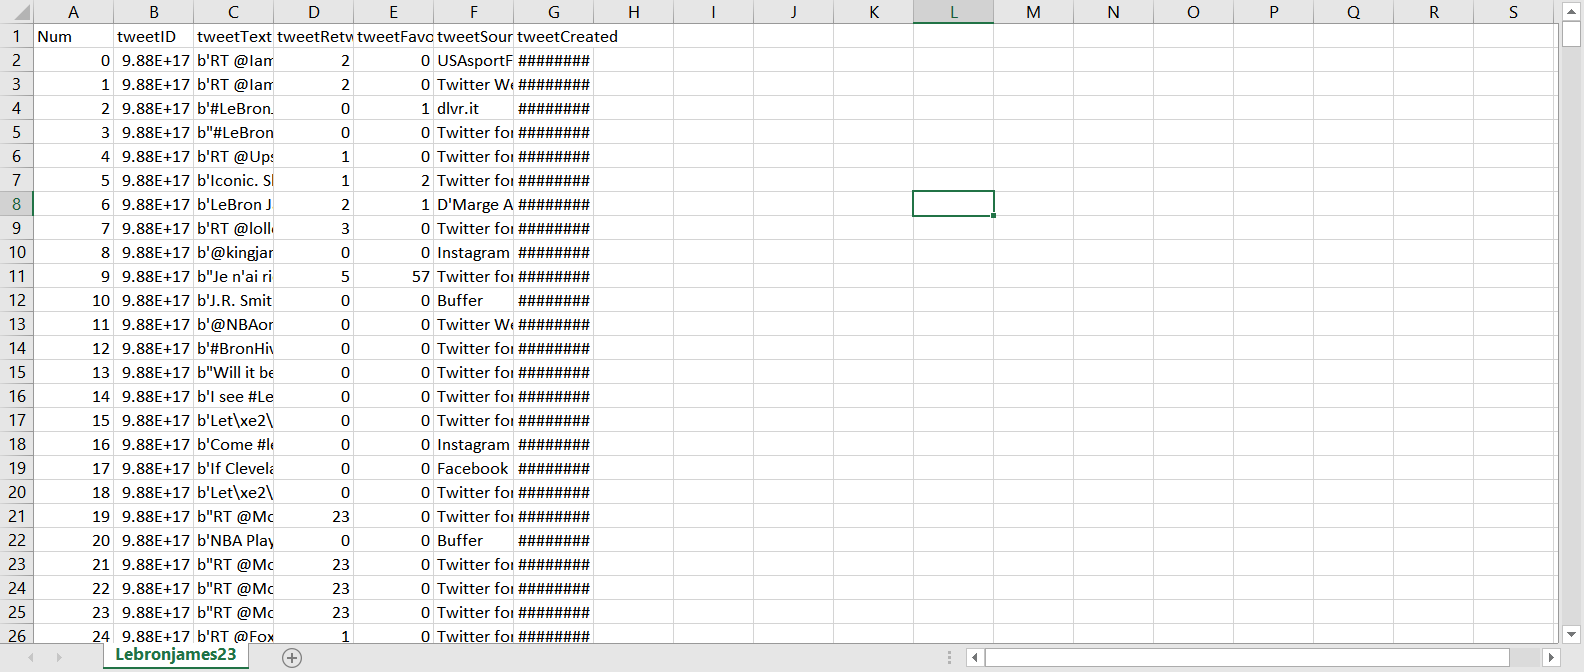

Then what I should do it insert this data into database as my tags"lebronjames"'s table.
what I also do to query the tags about lebron james , then get the most popular one as my tags.
Next, do the same things to get data from twitter.

<h3>Social media questions</h3>

first to use pymysql connect mysql use python.

In [4]:
import pymysql
import pymysql.cursors
import numpy as np
import pandas as pd
import pprint as pp



db=pymysql.connect(host='localhost',
                          user='root',
                          password='631727177',
                          db='finalprojects',
                          port=3306,
                           charset='utf8'
                          )

In [5]:
cursor=db.cursor()

In [6]:
def sql_to_df(sql_query):
    df=pd.read_sql(sql_query,db)
    return df

i.What are people saying about me (somebody)? 

Thinking : I think this question needs to choose tag first.We can choose a tag to represent a people ,and then search all the comments that have this tag.Then We can get that what people are saying about me.So I choose stephencurry As my tag, then search from nba table,get the text ,then collect them.



In [7]:
sql="Select text from nba where text like'%#StephenCurry%'"
sql_to_df(sql)

,text
0,b'https://t.co/FMav3reeIT Always a winner sho...
1,b'https://t.co/4EKVj4mNkk Will there be a rep...
2,b'Check out how professional athletes are turn...
3,b'#TrendingNow #yahoo #monday\n#LarryFlynt #St...
4,b'https://t.co/FMav3reeIT Always a winner sho...
5,b'https://t.co/4EKVj4mNkk Salute the MVP! #s...
6,b'#gswarriors #stephencurry @ The Warriors Sto...
7,b'#stephencurry @ The Warriors Store https://t...
8,b'RT @NBAAllStar: #StephenCurry #KevinDurant #...
9,b'RT @NBAAllStar: #DubNation and #TeamStephen ...


ii.How viral are my posts? 

thinking: the viral of the posts is reflecting on the favs and retweets.
<b>Here,I define :viral=0.7*retweets+0.3*favs</b>,then caculate the viral of its viral of posts, then average the viral,get the final viral of its posts. So the first step is that I have to grasp twitters from one person(here, I use celtics homepage) and then use my varl equal, get the average of viral.

In [8]:
sql="SELECT ID,Created_at,text,Fav,retweets,(0.3*Fav +0.7*retweets) As viralofmypost from tweets order BY viralofmypost desc;"
sql_to_df(sql)

,ID,Created_at,text,Fav,retweets,viralofmypost
0,950227854507245569,2018-01-08 4:49:09,RT @KyrieIrving: Jayson Tatum #NBAVote,0,34845,24391.5
1,962680121273368576,2018-02-11 13:30:01,Forever The Truth.\nForever a Celtic.\n#ThankY...,23700,11596,15227.2
2,950227867413118976,2018-01-08 4:49:12,RT @KyrieIrving: Jaylen Brown #NBAVote,0,17261,12082.7
3,962835502087864321,2018-02-11 23:47:26,Inglewood made him.\nKansas shaped him.\nBut h...,18113,8327,11262.8
4,952677981800972288,2018-01-14 23:05:05,? Only 1 more day to vote for Jayson Tatum ?\n...,4924,12883,10495.3
5,949801885917237253,2018-01-07 0:36:30,JAYSON. TATUM. #NBAVote https://t.co/VCKs62kpsK,13062,8062,9562.0
6,950227862115831809,2018-01-08 4:49:11,RT @KyrieIrving: Al Horford #NBAVote,0,13078,9154.6
7,950533990011883521,2018-01-09 1:05:37,RT @jaytatum0: Kyrie Irving #NBAVOTE,0,11492,8044.4
8,959433962337775616,2018-02-02 14:30:56,Sending a scout out ASAP https://t.co/BAPB3pIQ5a,12852,3805,6519.1
9,950075836501196800,2018-01-07 18:45:05,Keep the votes coming! Kyrie Irving is in posi...,3695,7452,6324.9


In [13]:
sql="Create table theviralofpost(Select (0.3*Fav +0.7*retweets) As viralofmypost from tweets)"


In [15]:
sql="Select Avg(viralofmypost)from theviralofpost"
sql_to_df(sql)

,Avg(viralofmypost)
0,691.26531


Finally, I get the avg of viralofcelticshomepage post.This result just show how viral of posts.If you want compare with others' page , this can be used.

iii.How much influence to my posts have? 

Thinking:first you should choose screen name,get what he has posted in a peroid time.And then <b>I define: influence=0.3*favos +0.1*reweet+0.6*userfollower</b>.Then get it's average infulence.

In [16]:
sql="select screen_name, (0.3*favos +0.1*reweet+0.6*userfollower) As influenceoftweets from nba where screen_name like '%Motiversity_%'"
sql_to_df(sql)

,screen_name,influenceoftweets
0,Motiversity_,5932.9


In [17]:
sql="create table influenceof (select screen_name, (0.3*favos +0.1*reweet+0.6*userfollower) As influenceoftweets from nba where screen_name like '%Motiversity_%')"

In [20]:
sql="select Avg(influenceoftweets)from influenceof "
sql_to_df(sql)

,Avg(influenceoftweets)
0,5932.9


Finally I get this person's influence of post

iv.What posts are like mine?

First, I choose the screen_name do get his posts.Then use get what hashtags he uses,then use the hashtags to search what post does have the similar hashtags, then we get post that is like him.


In [43]:
sql=sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT Num , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM lbj123, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)


,word,total
0,#lebronjames,151
1,the,142
2,to,86
3,is,75
4,AND,56
5,a,51
6,in,48
7,Game,42
8,#Cavs,37
9,on,34


So we can get tags like "#Lebronjames,#Cavs","NBAplayoff","James"

In [54]:
sql="select * from rockets where text like '% #nbaplayoff%'"
sql_to_df(sql)

,Num,created_at,favorite_count,retweet_count,text
0,1,2018/4/16 21:19,0,0,b'The players stats and storylines that will ...
1,10,2018/4/16 18:25,0,0,b'Shout out @HoustonRockets for winning their ...
2,16,2018/4/16 17:20,0,0,b'NBA Playoffs - Who are you supporting in the...
3,22,2018/4/16 16:11,4,0,b'My name gon\xe2\x80\x99 hold up - my team go...
4,25,2018/4/16 16:06,0,0,b'@jharden13 with a huge night in game 1.. #un...
5,41,2018/4/16 6:38,1,0,"b'Day 2 of the #NBAPlayoffs is in the books, a..."
6,42,2018/4/16 6:37,2,0,b'A step back three is not a travel.. but Ja...
7,56,2018/4/16 4:39,1,0,b'#JamesHarden is hands DOWN #NBA league #MVP ...
8,57,2018/4/16 4:30,0,0,b'James harden is a walking bucket \xf0\x9f\x8...
9,67,2018/4/16 4:04,0,0,b'Harden leading the team as only he can to a ...


finally , we get the post like mine

v.What users post like me?

thinking: I firstly go to Celtics_homepage find some tags and search tags in NBA_tweets to find other users,this is to search users post like me,we should get screen name.

In [23]:
sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT id  , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM tweets, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)

,word,total
0,the,361
1,to,174
2,a,141
3,in,122
4,of,108
5,on,107
6,and,105
7,Celtics,96
8,?,82
9,for,70


we can easily get some heshtags("#Playoff","#NBA")

In [38]:
sql="select * from nba where text like '%#playoff%'"
sql_to_df(sql)


,id,tweeid,text,reweet,favos,source,created_at,userid,screen_name,user_created_at,userfollower,userfriend,time_zone
0,43,9.85E+17,b'\xe4\xb8\x8d\xe5\x88\xb0\xe4\xb8\xa4\xe4\xb8...,0,0,Twitter for Android,2018/4/14 17:36,4305864976,_KatherineBeals,2015/11/28 9:45,19,18,
1,76,9.85E+17,b'Warriors will be without Curry in first roun...,0,0,Facebook,2018/4/13 18:04,618818200,SportsWatch1,2012/6/26 6:57,21810,24063,Eastern Time (US & Canada)
2,81,9.85E+17,b'\xc2\xa1terribles noticias! Ma\xc3\xb1ana se...,0,0,Mobile Web (M2),2018/4/13 16:05,2602328810,ThompsonCharli,2014/7/3 22:13,43,100,


In [40]:

sql="select *from nba where text like'%#NBA%'"
sql_to_df(sql)


,id,tweeid,text,reweet,favos,source,created_at,userid,screen_name,user_created_at,userfollower,userfriend,time_zone
0,12,9.86E+17,b'RT @NBAAllStar: #StephenCurry #KevinDurant #...,826,0,Twitter for iPhone,2018/4/15 19:22,7.11E+17,Mjvcdsx_Snchez,2016/3/19 1:31,375,387,
1,19,9.86E+17,"b""RT @respectmyblog: Under Armour Curry 5 'PI ...",1,0,Twitter for Android,2018/4/15 14:54,3650217854,respectmyblog,2015/9/22 16:02,1805,1523,
2,23,9.85E+17,b'#NBAPlayoffs 2018: From #StephenCurry health...,0,0,Twitter Web Client,2018/4/14 23:22,7.19E+17,Bronxvoice1,2016/4/9 0:22,1282,4990,
3,25,9.85E+17,"b'Thompson, Durant lead Warriors to NBA playof...",0,0,Twitter Web Client,2018/4/14 22:46,290417646,Dohastadiumplus,2011/4/30 7:29,11615,523,Riyadh
4,32,9.85E+17,b'#NBAPlayoffs #warriorsvsspurs GS is hot alth...,0,1,Twitter for Android,2018/4/14 21:20,39883478,nhea,2009/5/14 0:38,127,698,Eastern Time (US & Canada)
5,37,9.85E+17,b'Ready to watch the @warriors play the @spurs...,0,0,Twitter for Android,2018/4/14 19:08,590460253,mheinm,2012/5/26 0:58,77,182,Central Time (US & Canada)
6,43,9.85E+17,b'\xe4\xb8\x8d\xe5\x88\xb0\xe4\xb8\xa4\xe4\xb8...,0,0,Twitter for Android,2018/4/14 17:36,4305864976,_KatherineBeals,2015/11/28 9:45,19,18,
7,44,9.85E+17,b'\xf0\x9f\x8f\x80 Al menos 1 semana m\xc3\xa1...,0,1,Twitter for Android,2018/4/14 17:16,222061399,ElSextoHombreOC,2010/12/2 10:40,3755,711,Belgrade
8,47,9.85E+17,b'@money23green @warriors @SFWarriorNation @Le...,0,0,Twitter for Android,2018/4/14 16:07,54712692,reallydiadavis,2009/7/7 23:04,275,85,Pacific Time (US & Canada)
9,51,9.85E+17,b'This could be the first year in awhile the t...,0,0,Twitter for iPhone,2018/4/14 13:39,3823590329,Sports_OurWay,2015/9/30 11:16,126,197,


vi.Who should I be following? 

thinking : I choose  Celtics_homepage to find some tags and search tags in NBA tweets to find other users

<b>Also I define popular person=  0.2 Fav + 0.2 Retweet+0.6followers</b>
then get the most popular person to follow.



In [58]:
sql="select screen_name, (0.2*favos +0.2*reweet+0.6*userfollower) As popularity from nba where text like '%#playoff%' order by popularity desc"
sql_to_df(sql)

,screen_name,popularity
0,SportsWatch1,13086.0
1,ThompsonCharli,25.8
2,_KatherineBeals,11.4


So we can easily to get who we should follow, using popularity.

vii.What topics are trending in my domain?

 divide all the posts into several parts according to time perio
 Use the function count (high frequency) in mysql to get the high frequency tags multiple times

In [59]:
sql="SELECT * FROM finalprojects.tweets where Created_at between '2018-02-25' and '2018-02-27'"
sql_to_df(sql)

,Num,ID,Created_at,Fav,retweets,text,media1,media2,media3,media4,compund,neg,neu,pos
0,32,968257087976468480,2018-02-26 22:50:53,619,83,?He?s one of the biggest reasons why our defen...,N/A,N/A,N/A,N/A,0.0258,0,0.945,0.055
1,33,968256242140377090,2018-02-26 22:47:32,243,46,#NEBHInjuryReport: Aron Baynes (elbow sprain) ...,N/A,N/A,N/A,N/A,0.0000,0,1.000,0.000
2,34,968236769555697666,2018-02-26 21:30:09,320,71,How many points per game is Kyrie averaging ov...,https://video.twimg.com/ext_tw_video/968236744...,N/A,N/A,N/A,0.0000,0,1.000,0.000
3,35,968226885086973952,2018-02-26 20:50:52,234,37,Ahead of his 1st NBA matchup vs. his college r...,N/A,N/A,N/A,N/A,0.2960,0,0.901,0.099
4,36,968199776218046465,2018-02-26 19:03:09,0,224,RT @celtics: One month is not enough. @fchwpo ...,https://video.twimg.com/amplify_video/96682770...,N/A,N/A,N/A,0.5719,0,0.829,0.171
5,37,968176755164024832,2018-02-26 17:31:40,416,49,College teammates Jaylen Brown and Ivan Rabb w...,https://video.twimg.com/amplify_video/96817619...,N/A,N/A,N/A,0.0000,0,1.000,0.000
6,38,968129061796089856,2018-02-26 14:22:09,1390,292,TONIGHT #Celtics vs @memgrizz \n? @tdgarden...,http://pbs.twimg.com/media/DW98QAgWsAARKF2.jpg,N/A,N/A,N/A,0.0000,0,1.000,0.000
7,39,967862283555700743,2018-02-25 20:42:05,435,845,This could be YOU. Retweet to win C's tickets ...,http://pbs.twimg.com/media/DW6JnfpX0AAEMgn.jpg,N/A,N/A,N/A,0.8779,0,0.664,0.336
8,40,967821545874829312,2018-02-25 18:00:12,297,43,Rep the 617. Gear up with the new City Edition...,http://pbs.twimg.com/media/DW5kkEYVQAAqieX.jpg,N/A,N/A,N/A,0.0000,0,1.000,0.000
9,41,967793902194487296,2018-02-25 16:10:21,407,75,#ICYMI: Jaylen and Jayson threw it down at All...,https://video.twimg.com/ext_tw_video/967793837...,N/A,N/A,N/A,0.0000,0,1.000,0.000


In [60]:
sql="create table time1 (SELECT * FROM finalprojects.tweets where Created_at between '2018-02-25' and '2018-02-27')"

In [62]:
sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT id  , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM time1, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)

,word,total
0,the,13
1,and,6
2,Celtics,4
3,with,4
4,?,3
5,??,3
6,it,3
7,Jaylen,3
8,Knicks,3
9,of,3


In [64]:
sql="SELECT * FROM finalprojects.tweets where Created_at between '2018-02-23' and '2018-02-25'"
sql_to_df(sql)

,Num,ID,Created_at,Fav,retweets,text,media1,media2,media3,media4,compund,neg,neu,pos
0,65,967540449299845132,2018-02-24 23:23:13,737,117,Arriving at MSG on the #JetBlueRunway https://...,http://pbs.twimg.com/media/DW1k59UXUAEjhbF.jpg,http://pbs.twimg.com/media/DW1k59YWsAA5ULV.jpg,http://pbs.twimg.com/media/DW1k59aXcAEu5Sg.jpg,http://pbs.twimg.com/media/DW1k59VWsAEj2_R.jpg,0.0000,0,1.000,0.000
1,66,967535198895247365,2018-02-24 23:02:22,241,56,#NEBHInjuryReport Shane Larkin is available to...,N/A,N/A,N/A,N/A,0.0000,0,1.000,0.000
2,67,967511997188378624,2018-02-24 21:30:10,193,32,One team is in the top 10 for points off drive...,https://video.twimg.com/ext_tw_video/967511971...,N/A,N/A,N/A,0.2023,0,0.950,0.050
3,68,967437172533055488,2018-02-24 16:32:50,1036,260,TONIGHT #Celtics vs @nyknicks \n? @TheGarden...,http://pbs.twimg.com/media/DW0G-tlWsAAWueh.jpg,N/A,N/A,N/A,0.0000,0,1.000,0.000
4,69,967269654904229889,2018-02-24 5:27:11,1327,242,Daniel Theis' career-high 19-point effort Frid...,https://video.twimg.com/amplify_video/96726829...,N/A,N/A,N/A,0.5859,0,0.826,0.174
5,70,967236333671538688,2018-02-24 3:14:46,0,214,RT @SeanGrandePBP: My new favorite Al stat...\...,N/A,N/A,N/A,N/A,0.4588,0,0.885,0.115
6,71,967235715875696645,2018-02-24 3:12:19,0,226,RT @celtics_stats: Boston has now held its opp...,N/A,N/A,N/A,N/A,0.0000,0,1.000,0.000
7,72,967233431716364288,2018-02-24 3:03:15,284,45,.@smart_MS3 helped guide our defense over DET ...,N/A,N/A,N/A,N/A,0.5859,0,0.784,0.216
8,73,967227669405253632,2018-02-24 2:40:21,322,74,Tonight's @JetBlue Play of the Game: Daniel Th...,https://video.twimg.com/amplify_video/96722300...,N/A,N/A,N/A,0.7269,0,0.736,0.264
9,74,967224071195889664,2018-02-24 2:26:03,199,42,#NEBHInjuryReport Stevens says Baynes strained...,N/A,N/A,N/A,N/A,0.0000,0,1.000,0.000


In [66]:
sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT id  , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM time2, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)

,word,total
0,the,13
1,a,7
2,on,7
3,in,6
4,??,4
5,is,4
6,new,4
7,of,4
8,#Celtics,3
9,back,3


In [67]:
sql="SELECT * FROM finalprojects.tweets where Created_at between '2018-02-21' and '2018-02-23'"
sql_to_df(sql)

,Num,ID,Created_at,Fav,retweets,text,media1,media2,media3,media4,compund,neg,neu,pos
0,100,966779722993717248,2018-02-22 21:00:22,248,47,We entered the All-Star break in a defensive f...,N/A,N/A,N/A,N/A,0.0129,0,0.954,0.046
1,101,966776063857647616,2018-02-22 20:45:50,351,74,"As we enter our final 23 games of the season, ...",https://video.twimg.com/amplify_video/96677344...,N/A,N/A,N/A,0.3818,0,0.825,0.175
2,102,966771999262601216,2018-02-22 20:29:41,2341,310,????Detroit https://t.co/DrbiDImBKm,http://pbs.twimg.com/media/DWqp_7ZU0AENRgH.jpg,http://pbs.twimg.com/media/DWqp_7YU0AEvnVi.jpg,http://pbs.twimg.com/media/DWqp_7ZVAAABkJA.jpg,http://pbs.twimg.com/media/DWqp_7ZU0AIo-4T.jpg,0.0000,0,1.000,0.000
3,103,966744202112577537,2018-02-22 18:39:13,314,51,Marcus Smart (left quad contusion) did not pra...,N/A,N/A,N/A,N/A,0.6059,0,0.793,0.207
4,104,966740800993456134,2018-02-22 18:25:42,364,57,?Our schedule is really hard as we hit this la...,http://pbs.twimg.com/media/DWqNnlWX4AAdJBj.jpg,N/A,N/A,N/A,0.8522,0,0.768,0.201
5,105,966740145658650624,2018-02-22 18:23:06,180,30,Shane Larkin (knee) was able to go through pra...,N/A,N/A,N/A,N/A,0.0000,0,1.000,0.000
6,106,966738899367268352,2018-02-22 18:18:09,408,62,"?I think we have a sense of urgency about us,?...",http://pbs.twimg.com/media/DWqL5hJVMAA_NoZ.jpg,N/A,N/A,N/A,0.0000,0,1.000,0.000
7,107,966696594002210816,2018-02-22 15:30:03,528,134,Larry Bird climbed further up our all-time lea...,https://video.twimg.com/amplify_video/96669140...,N/A,N/A,N/A,0.0000,0,1.000,0.000
8,108,966524519761395714,2018-02-22 4:06:17,925,135,Marcus Smart returned to practice Wednesday af...,https://video.twimg.com/amplify_video/96651518...,N/A,N/A,N/A,0.2263,0,0.478,0.282
9,109,966503192472293377,2018-02-22 2:41:32,513,79,Brad Stevens visited the @RedSox on their 1st ...,N/A,N/A,N/A,N/A,0.4019,0,0.912,0.088


In [69]:
sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT id  , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM time3, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)

,word,total
0,the,8
1,practice,5
2,to,4
3,a,3
4,of,3
5,on,3
6,our,3
7,says,3
8,Stevens,3
9,we,3


So we need to compare three time slots :time1 time2 time3 to get what is the trends of our domian.

viii.What keywords/ hashtags should I add to my post? 

thinking : so this is the most choose what hashtags should add to my post , I think there are two details, first you have to specify what topic you post , post one news for a person or a team even events.So you should firstly search all of tweets about this person "stephencurry", then get his most popular tags, this easily to get count of tags from text.

In [71]:
sql=sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT id , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM nba, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)


,word,total
0,#stephencurry,41
1,the,32
2,be,25
3,I,21
4,IS,19
5,Best,18
6,people,17
7,tell,17
8,what,17
9,@Motiversity_:,15


My nba table is the post all about stephencurry in a time period , then we should get high popularity tags about curry to add on my post about curry.

ix.Should I follow somebody back? 

Thinking : first you should choose the person who is you follower and you are not following him.Then you should see it's favorite and retweet of his post  also the follower so I also <b>define followback=0.2 Fav + 0.2 Retweet+0.6followers</b> to get the person that I shoule follow back.

Then I used the table of the person who post in a period time for your post  and you have similarity of their post.

In [76]:
sql=sql="SELECT word , COUNT(*) total FROM ( SELECT DISTINCT id , SUBSTRING_INDEX(SUBSTRING_INDEX(text,' ',i+1),' ',-1) word  FROM nba, ints ) x GROUP BY word HAVING COUNT(*) > 1 ORDER BY total DESC, word;"
sql_to_df(sql)


,word,total
0,#stephencurry,41
1,the,32
2,be,25
3,I,21
4,IS,19
5,Best,18
6,people,17
7,tell,17
8,what,17
9,@Motiversity_:,15


In [75]:
sql="select distinct screen_name, (0.2*favos +0.2*reweet+0.6*userfollower) As popularity from nba where text like '%#StephenCurry%' order by popularity desc"
sql_to_df(sql)

,screen_name,popularity
0,AlArabiya_Eng,468160.6
1,marshawright,339034.6
2,SportsWatch1,13086.0
3,YouGotWho,11322.6
4,gary_takacs,9123.8
5,homeshopbuzz,8503.8
6,tuitdepor,7110.6
7,Dohastadiumplus,6969.0
8,JoanneSpruceC21,2890.8
9,PlayerlineNBA,2521.2


So we can easily to get who we should follow back.

x.What is the best time to post?(facebook)

thinking: this question is to ask something about what time to post you can get more retweet and favs, 
so what I should do is filter the similar post which have same hashtags.Then sorting them by favs and retweet.
this I should define the best time to post is 0.5*favs+0.5retweets

In [89]:
sql="select Created_at ,(0.5*Fav+0.5*retweets) as timepost from tweets where text like '%#NBAvote%' order by timepost desc"
sql_to_df(sql)


,Created_at,timepost
0,2018-01-08 4:49:09,17422.5
1,2018-01-07 0:36:30,10562.0
2,2018-01-14 23:05:05,8903.5
3,2018-01-08 4:49:12,8630.5
4,2018-01-08 4:49:11,6539.0
5,2018-01-09 1:05:37,5746.0
6,2018-01-07 18:45:05,5573.5
7,2018-01-14 0:00:04,5281.5
8,2018-01-14 23:20:02,5042.0
9,2018-01-06 2:15:50,4680.5


So see the created_at we can easily get what time we should post.(remember choose a topic first)

xi.Should I add and picture or url to my post? 

Here ,what we want to see is that we should add picture or url to my post.Easily get the answer when compare with picture or video with no picture and video.I use facebookdata about NBA.SO I like to define the popularity:0.5*coments + 0.25*likes+0.25*shares.

In [101]:
sql="select link_type,(0.5*comments + 0.25*likes+0.25*shares)as popularity from facebooksnba where link_type='null' order by popularity desc"
sql_to_df(sql)

,link_type,popularity
0,null,258.00
1,null,169.25
2,null,92.25


In [102]:
sql="select link_type,(0.5*comments + 0.25*likes+0.25*shares)as popularity from facebooksnba where link_type='video' order by popularity desc"
sql_to_df(sql)

,link_type,popularity
0,video,63956.00
1,video,52958.25
2,video,42724.50
3,video,40369.00
4,video,32629.25
5,video,28406.75
6,video,24840.25
7,video,24665.00
8,video,22702.25
9,video,16337.50


In [103]:
sql="select link_type,(0.5*comments + 0.25*likes+0.25*shares)as popularity from facebooksnba where link_type='photo' order by popularity desc"
sql_to_df(sql)

,link_type,popularity
0,photo,14972.50
1,photo,11950.00
2,photo,11195.50
3,photo,4305.75
4,photo,2439.25
5,photo,2251.50
6,photo,1885.00
7,photo,1020.75
8,photo,752.25
9,photo,487.25


Compared with three tables we can easily get the answer of this question" should I add url or photo "ON our post.

xii.What’s my reach?

what i am thinking about is that we should get information from the userfollower.Becuase As we all know that one peoson is be followed by others ,
if he firstime to post it;s news , his follower are the first to get because they have notices.So their followers' location define it;s reach'
So we should get our follower location like that .

In [109]:
sql="select * from userfollowers"
sql_to_df(sql)

,﻿userLocation
0,"Las Vegas, NV"
1,"Chicago, IL"
2,Barquisimeto. Venezuela.
3,"Arizona, US"
4,"Olongapo City, Philippines"
5,"Olongapo City, Philippines"
6,"Las Vegas, NV"
7,"Olongapo City, Philippines"
8,Cherche
9,"Barcelone, Espagne"


What's more, I need to like just search one people's post does really reach other domain, like music's domain also like basketball,So what I need to do is that I should follow the retweet and favs' users about my post. We should also grasp the retweet user's post to get the information.

So we can easily to get what is your post reach.When get the location of your user followers.

<h3>Appendix</h3>
<p>tweepy:http://tweepy.readthedocs.io/en/v3.5.0/
<p>pymysql:https://pymysql.readthedocs.io/en/latest/
<p>pandas:https://pandas.pydata.org/
<p>twitterjson:https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json
<p>pprint:https://docs.python.org/3/library/pprint.html
<p>cursor:https://dev.mysql.com/doc/connector-python/en/connector-python-api-mysqlcursor.html


<h3>Licence</h3>


<p>The text in the document licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/
<p>The code in the document is licensed under the MIT License https://opensource.org/licenses/MIT